In [125]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 999)
pd.set_option('display.width', 500)
pd.set_option('display.notebook_repr_html', True)
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math
from collections import defaultdict
from collections import Counter
from astropy.io import fits

In [126]:
df = pd.read_csv('out_states.txt', sep='\s+', names=['jd','x','y','z','vx','vy','vz'])   
df

,jd,x,y,z,vx,vy,vz
0,2.458850e+06,3.338876,-0.917652,-0.503859,0.002806,0.007550,0.002980
1,2.458851e+06,3.342019,-0.909152,-0.500504,0.002780,0.007558,0.002984
2,2.458853e+06,3.348841,-0.890393,-0.493094,0.002723,0.007573,0.002992
3,2.458857e+06,3.358091,-0.864248,-0.482757,0.002643,0.007594,0.003004
4,2.458860e+06,3.368200,-0.834659,-0.471045,0.002553,0.007617,0.003017
5,2.458864e+06,3.377590,-0.806124,-0.459736,0.002467,0.007638,0.003029
6,2.458867e+06,3.384940,-0.783016,-0.450568,0.002397,0.007654,0.003038
7,2.458869e+06,3.389320,-0.768892,-0.444960,0.002354,0.007664,0.003044
8,2.458870e+06,3.390375,-0.765446,-0.443591,0.002343,0.007667,0.003045
9,2.458871e+06,3.392998,-0.756816,-0.440162,0.002317,0.007673,0.003049


(-4, 4)

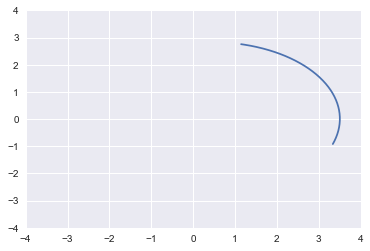

In [127]:
plt.plot(df['x'], df['y'])
plt.xlim(-4, 4)
plt.ylim(-4, 4)

In [128]:
import importlib

In [129]:
import ephem_forces

In [136]:
importlib.reload(ephem_forces)

<module 'ephem_forces' from '/Users/mholman/reboundx/examples/ephem_forces/ephem_forces.py'>

In [137]:
importlib.reload(demo)

200 200
0 2458849.5 3.338876057509365 -0.9176517956664152 -0.5038590450387491
1 2458850.6252512108 3.3420185832932283 -0.909151686243194 -0.5005035668774857
2 2458853.1048138347 3.3488405463425286 -0.8903931798040023 -0.4930941578657226
3 2458856.5524943424 3.358090728070426 -0.8642479456149377 -0.482757131059693
4 2458860.4430725267 3.3681997805857526 -0.8346589565216848 -0.4710447050996993
5 2458864.184203544 3.3775903760751085 -0.8061242935987643 -0.4597358264740497
6 2458867.2064189366 3.3849396032787853 -0.7830160462750435 -0.4505677083321574
7 2458869.050412271 3.389319580680217 -0.7688923193124442 -0.44495986079335775
8 2458869.5 3.3903754948630596 -0.7654460393756415 -0.44359101608198775
9 2458870.6252512108 3.392997696017171 -0.7568158487953954 -0.44016230061897305
10 2458873.1048138347 3.3986719301497335 -0.7377754696902109 -0.4325934145513912
11 2458876.5524943424 3.4063236614259855 -0.7112492147401345 -0.42203900489200014
12 2458880.4430725267 3.4146253817287633 -0.68124549

<module 'demo' from '/Users/mholman/reboundx/examples/ephem_forces/demo.py'>

In [138]:
import demo

In [139]:
demo.states

In [131]:
states, nout = ephem_forces.integration_function(2458849.5, 20.0, 500, 0, 
                                  3.338876057509365E+00, -9.176517956664152E-01, -5.038590450387491E-01,
                                  2.805663678557796E-03, 7.550408259144305E-03, 2.980028369986096E-03)




In [124]:
np.array(states)

array([(2458849.5       , 3.33887606, -9.17651796e-01, -0.50385905,  2.80566368e-03, 0.00755041, 0.00298003, 0., 0., 0.),
       (2458850.62525121, 3.34201858, -9.09151686e-01, -0.50050357,  2.77979862e-03, 0.00755751, 0.00298393, 0., 0., 0.),
       (2458853.10481383, 3.34884055, -8.90393180e-01, -0.49309416,  2.72274064e-03, 0.00757293, 0.00299243, 0., 0., 0.),
       (2458856.55249434, 3.35809073, -8.64247946e-01, -0.48275713,  2.64326422e-03, 0.00759382, 0.00300404, 0., 0., 0.),
       (2458860.44307253, 3.36819978, -8.34658957e-01, -0.47104471,  2.55338626e-03, 0.00761663, 0.00301683, 0., 0., 0.),
       (2458864.18420354, 3.37759038, -8.06124294e-01, -0.45973583,  2.46677441e-03, 0.00763781, 0.00302882, 0., 0., 0.),
       (2458867.20641894, 3.3849396 , -7.83016046e-01, -0.45056771,  2.39667672e-03, 0.00765437, 0.0030383 , 0., 0., 0.),
       (2458869.05041227, 3.38931958, -7.68892319e-01, -0.44495986,  2.35385130e-03, 0.00766423, 0.00304398, 0., 0., 0.),
       (2458869.5       

In [120]:
for state in states:
    print(state.t, state.vx, state.y)

2458849.5 0.002805663678557796 -0.9176517956664152
2458850.6252512108 0.0027797986184787352 -0.909151686243194
2458853.1048138347 0.002722740637491084 -0.8903931798040023
2458856.5524943424 0.0026432642203293977 -0.8642479456149377
2458860.4430725267 0.002553386259949506 -0.8346589565216848
2458864.184203544 0.0024667744137330705 -0.8061242935987643
2458867.2064189366 0.00239667672129977 -0.7830160462750435
2458869.050412271 0.0023538512954593893 -0.7688923193124442
2458869.5 0.0023434036488527397 -0.7654460393756415
2458870.6252512108 0.0023172440320416185 -0.7568158487953954
2458873.1048138347 0.0022595462442633408 -0.7377754696902109
2458876.5524943424 0.0021792013488230737 -0.7112492147401345
2458880.4430725267 0.0020883727680989323 -0.68124549853098
2458884.184203544 0.0020008761341778333 -0.6523272847876647
2458887.2064189366 0.0019300845966300044 -0.6289201094913979
2458889.050412271 0.0018868449822672193 -0.6146187867467137
2458889.5 0.0018762974023219343 -0.6111297578118539
24

In [ ]:
ma = np.arange(0, 2*np.pi, 0.1)
ma